# Convolution
        The basic formal definition of convolution is:-
![Convolution Definition](../img/conv_defin.png)
            
            It is basically sliding one function on top of the other.
        
            You can read about how we came to this expression 
            https://colah.github.io/posts/2014-07-Understanding-Convolutions/
            
        Visualisation of a 2-D convolution over an array:-
![Stride 1 Convolution](../img/basic_conv1.gif)

        Elements involved in Convolution:-
            1. Kernels(filters)
            2. Stride
            3. Padding
            4. Channels
            5. Image Size

        Visualisation of a 2-D convolution with stride 2 :-
![Stride 2 Convolution](../img/basic_conv2.gif)
        
        Output Image Size:-
            𝑂 = lower_bound((𝑊 − 𝐾 + 2𝑃)/(S)) + 1

## Effect of Kernels
        http://setosa.io/ev/image-kernels/

## Pooling
        The Pooling layer is responsible for reducing the spatial size of the Convolved Feature. This is to decrease the computational power required to process the data through dimensionality reduction. Furthermore, it is useful for extracting dominant features which are rotational and positional invariant.
        There are two types of Pooling:-
            1. Max Pooling:- It returns maximum value from the portion of the image covered by the Kernel. 
            2. Average Pooling:- It returns average of all the values from the portion of image covered by the Kernel.
            
![Stride 2 Convolution](../img/pool.jpeg)

        Max Pooling also performs as a Noise Suppressant. It discards the noisy activations altogether and also performs de-noising along with dimensionality reduction. On the other hand, Average Pooling simply performs dimensionality reduction as a noise suppressing mechanism. Hence, we can say that Max Pooling performs a lot better than Average Pooling.
            
![Max Pooling](../img/maxpool.gif)
        
        

## Implementation of Convolution in NumPy

(3280, 2460)


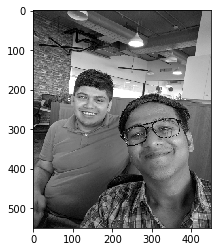

In [33]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import torch
import numpy as np
import torch.nn.functional as F
%matplotlib inline

im=cv2.imread("img/image2.jpg")
img=cv2.cvtColor(im, cv2.COLOR_RGB2GRAY)
print(img.shape)
img=cv2.resize(img, (450, 550))
plt.imshow(img, cmap='gray')
plt.show()

In [34]:
# Outline
kernel=np.array([[-1., -1.25, -1.],
                   [-1.25, 9.0, -1.25],
                   [-1., -1.25, -1.]])
print(kernel)

[[-1.   -1.25 -1.  ]
 [-1.25  9.   -1.25]
 [-1.   -1.25 -1.  ]]


In [35]:
new_image=np.zeros((img.shape[0]-kernel.shape[0]+1,img.shape[1]-kernel.shape[1]+1))
print(new_image.shape)

(548, 448)


In [36]:
#convolution
for ix in range(new_image.shape[0]):
    for iy in range(new_image.shape[1]):
        patch=img[ix:ix+kernel.shape[0], iy:iy+kernel.shape[1]]
        prod=patch*kernel
        
        new_image[ix,iy]=max(0,prod.sum())

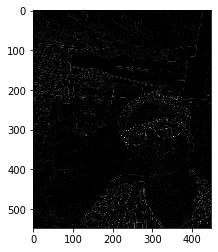

In [37]:
plt.imshow(new_image, cmap='gray')

![Convolution](img/convolution.gif)

## Types of Convolution

       1. 2D Convolution
       2. 3D Convolution
       3. 1X1 Convolution
       4. Deconvolution
           a) Transposed Convolution
           b) Fractionally Strided Convolution
       5. Dilated Convolution
       
       To read more about different types of convolution:-
       https://towardsdatascience.com/a-comprehensive-introduction-to-different-types-of-convolutions-in-deep-learning-669281e58215
           

# Convolutional Neural Network (ConvNet/CNN)

        The architecture of a ConvNet is analogous to that of the connectivity pattern of neurons in the human brain and was inspired by the organization of the visual cortex. Individual neurons respond to stimuli only in a restricted region of the visual field known as the Receptive Field. A collection of such fields overlap to cover the entire visual area.

![image.png](../img/cnn.png)

        Different Architectures in CNN:-
            1. AlexNet
            2. VGG
            3. ResNet
            4. DenseNet
            5. EfficientNet
         

<video controls src="../img/Neural.webm" />

## Why ConvNets over Feed Forward Networks
![CNN vs Feed](../img/cnn_feed.png)
        
        A ConvNet is able to successfully capture the Spatial and Temporal dependencies in an image through the application of relevant filters. The architecture performs a better fitting to the image dataset due to the reduction in the number of parameters involved and reusability of weights. In other words, the network can be trained to understand the sophistication of the image better.

## Activation Functions

         Activation Functions make sense of something really complicated and Non-linear complex functional mappings between the inputs and response variable.They introduce non-linear properties to our network.Their main purpose is to convert a input signal of a node in a ANN to an output signal. Without Activation Functions Neural Networks are just simple Linear Regression.
          We need to apply an Activation Function f(x) so as to make the network more powerful and add ability to it to learn something complex and complicated from data and represent non-linear complex arbitrary functional mappings between inputs and outputs.
          It should always be differentiable because we have to do backprop in neural networks.
        There are several Activation Functions:-
            1. ReLU - 6 times faster than Tanh but suffers dead neuron problem.
            2. Sigmoid - Used for Binary Classification(Slow Convergence, Vanishing Gradients, not 0 centered)
            3. Tanh - Faster and better than sigmoid(Vanishing Gradients)
            4. Softmax - Used for Multilabel Classification. 
               Used at the last of layers in NN b/w hidden layers we use ReLU
            5. Swish
            6. Mish

(100,)


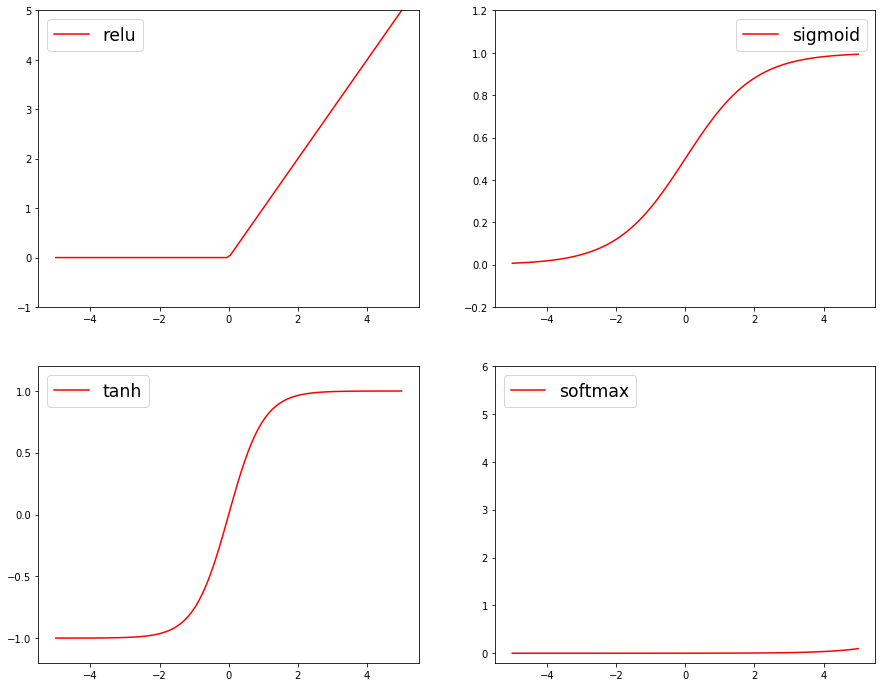

In [30]:
x= torch.linspace(-5, 5, 100)
x_np=x.numpy()
print(x_np.shape)

y_relu=torch.relu(x).numpy()
y_sigmoid=torch.sigmoid(x).numpy()
y_tanh=torch.tanh(x).numpy()
y_softplus=torch.softmax(x, dim=0).numpy()

plt.figure(1, figsize=(15, 12))
plt.subplot(221)
plt.plot(x_np, y_relu, c='red', label='relu')
plt.ylim((-1, 5))
plt.legend(loc='best', fontsize="xx-large")

plt.subplot(222)
plt.plot(x_np, y_sigmoid, c='red', label='sigmoid')
plt.ylim((-0.2, 1.2))
plt.legend(loc='best', fontsize="xx-large")

plt.subplot(223)
plt.plot(x_np, y_tanh, c='red', label='tanh')
plt.ylim((-1.2, 1.2))
plt.legend(loc='best', fontsize="xx-large")

plt.subplot(224)
plt.plot(x_np, y_softplus, c='red', label='softmax')
plt.ylim((-0.2, 6))
plt.legend(loc='upper left', fontsize="xx-large")

plt.show()

In [28]:
plt.legend??